# RT-IoT 2022
- The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios. Incorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can leverage the RT-IoT2022 dataset to advance the capabilities of Intrusion Detection Systems (IDS), fostering the development of robust and adaptive security solutions for real-time IoT networks.

### Importing Packages

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

### Loading Packages

In [45]:
df = pd.read_csv('RT_IOT2022')
df.head()

,sr.no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


### information about Dataset

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   sr.no                     123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

### Describing Attribute

In [47]:
df.describe()

,sr.no,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,37035.089248,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,30459.106367,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,6059.000000,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,33100.000000,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,63879.000000,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,94658.000000,65535.000000,65389.000000,21728.335578,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


### Getting Object columns

In [48]:
df_object_cols = df.select_dtypes("object")
df_object_cols.head()

,proto,service,Attack_type
0,tcp,mqtt,MQTT_Publish
1,tcp,mqtt,MQTT_Publish
2,tcp,mqtt,MQTT_Publish
3,tcp,mqtt,MQTT_Publish
4,tcp,mqtt,MQTT_Publish


### N-Unique values in dataset

In [49]:
df_object_cols.nunique()

proto           3
service        10
Attack_type    12
dtype: int64

### Value count in dataset

In [50]:
for i in df_object_cols.columns:
    print(df[i].value_counts())

tcp     110427
udp      12633
icmp        57
Name: proto, dtype: int64
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: service, dtype: int64
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: Attack_type, dtype: int64


### Null Values in Dataset

In [51]:
df.isnull().sum()

sr.no                   0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

### Checking for an outliers for integer columns

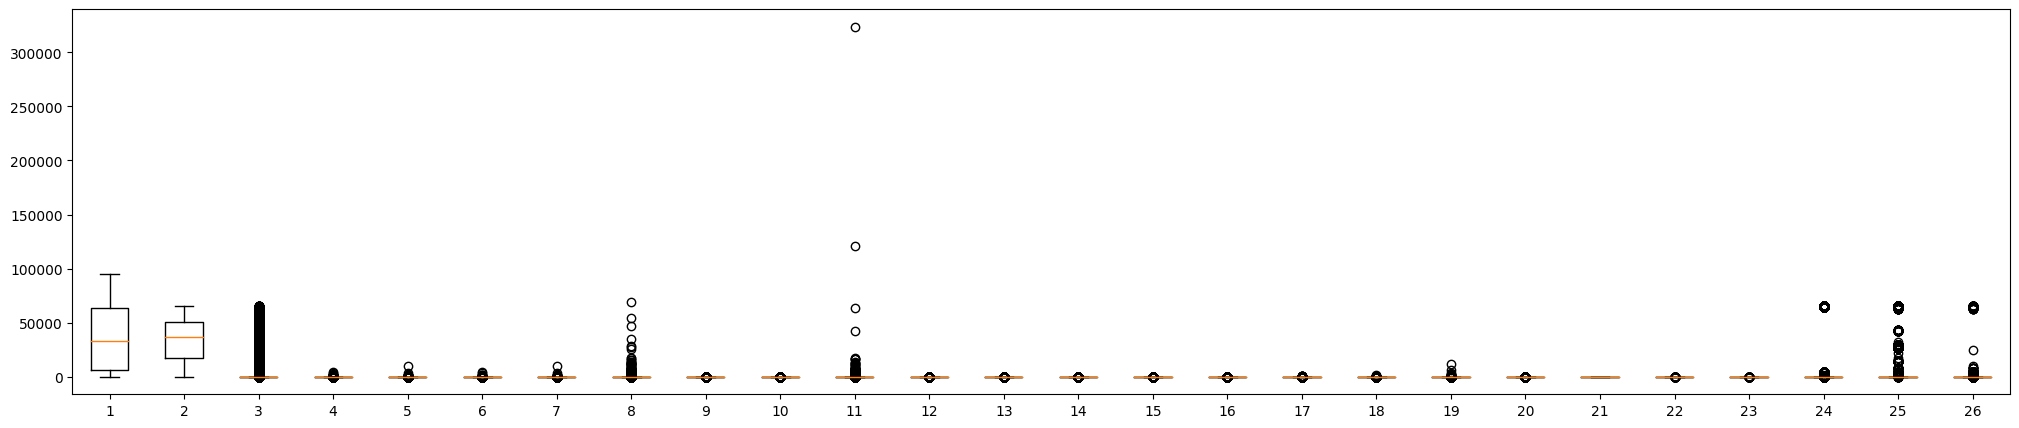

In [52]:
plt.figure(figsize=(25,5))
plt.boxplot(x=df.select_dtypes('int64'))
plt.show()

### Checking for an outliers for Float columns

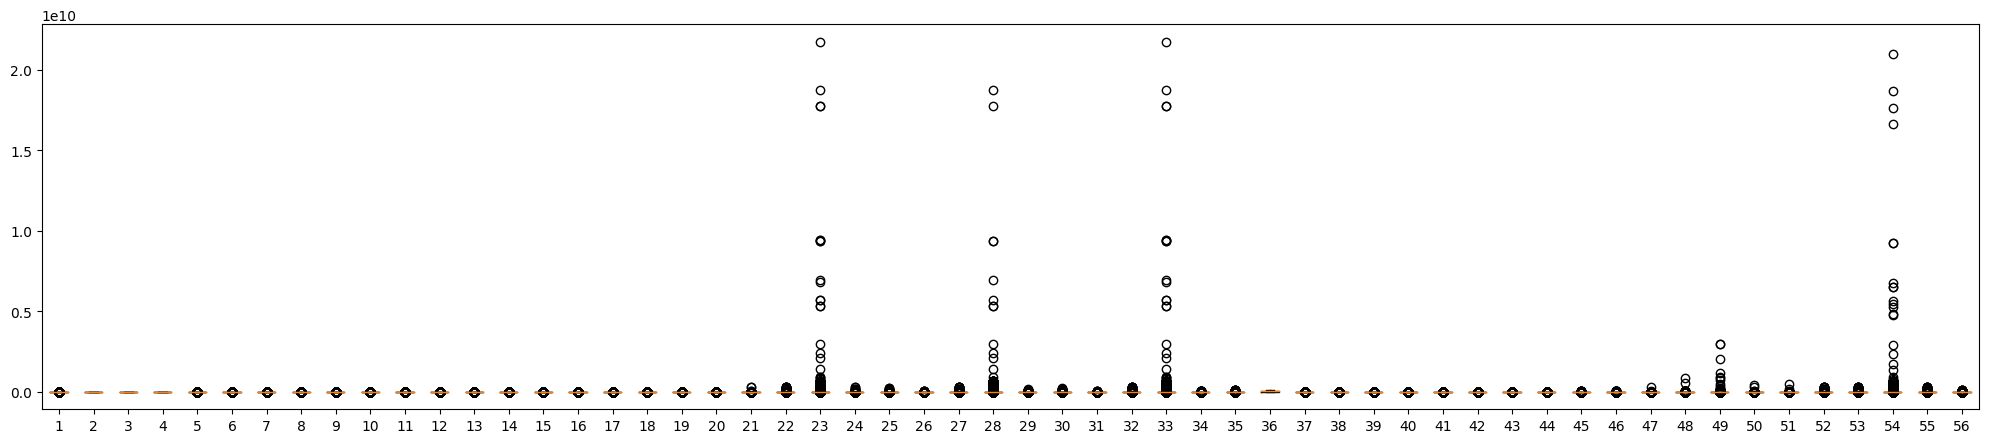

In [53]:
plt.figure(figsize=(25,5))
plt.boxplot(x=df.select_dtypes('float64'))
plt.show()

### Splitting into Features & Label

In [54]:
df_features = df.drop(['sr.no','Attack_type'],axis=1)
df_label = df[['Attack_type']]
print(df_label.nunique())
print(df_label.info())

Attack_type    12
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Attack_type  123117 non-null  object
dtypes: object(1)
memory usage: 962.0+ KB
None


### Data Preprocessing 
- Data Encoding
- Removing outliers
- Finding missing values
- Data Standarization

### Data Encoding

In [55]:
df_features_object_cols = df_features.select_dtypes('object').columns
encoder = OrdinalEncoder()
df_features[df_features_object_cols] = encoder.fit_transform(df_features[df_features_object_cols])
df_label_encoded = encoder.fit_transform(df_label)

### Removing Outliers

In [56]:
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_features_no_outliers = df_features[(df_features >= lower_bound) & (df_features <= upper_bound)]

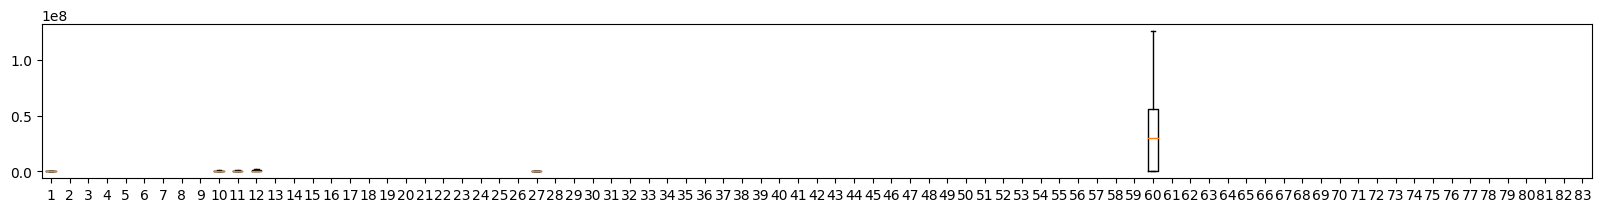

In [57]:
plt.figure(figsize=(20,2))
plt.boxplot(df_features_no_outliers)
plt.show()

### Finding Missing Values

In [58]:
imputer = SimpleImputer()
df_features_noNaN = imputer.fit_transform(df_features_no_outliers)

### Data Standardization


In [59]:
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features_noNaN)

### Final Feature & Label assigning

In [60]:
df_features_prepared = pd.DataFrame(df_features_scaled,columns=df_features.columns)
df_label_prepared = pd.DataFrame(df_label)
print(df_features_prepared.shape,df_label_prepared.shape)

(123117, 83) (123117, 1)


In [61]:
print(df_label_prepared.value_counts())

Attack_type               
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
dtype: int64


### Train Test Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_features_prepared,df_label_prepared,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(98493, 83) (24624, 83)
(98493, 1) (24624, 1)


## Model Building
- For learning purpose we will be using GradientBoostingClassifier 
- Model Selection
- Model Evaluation
    - Cross Validation Score
    - Cross Validation Predict
    - Precision
    - Recall
    - F1 scoring
    - Confusion Matrix
- Model Hyperparameter 
- Model Building on test set

### Model Selection

In [63]:
GboostingC = GradientBoostingClassifier(criterion='squared_error')

### Model Evaluation

### Cross Validation Score

In [64]:
score = cross_val_score(estimator=GboostingC,X=X_train,y=y_train,scoring='accuracy',cv=3)
print(score)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.96207852 0.9728001  0.97313515]


### Cross Validation Predict

In [65]:
predict = cross_val_predict(estimator=GboostingC,X=X_train,y=y_train,cv=3)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Confusion Matrix

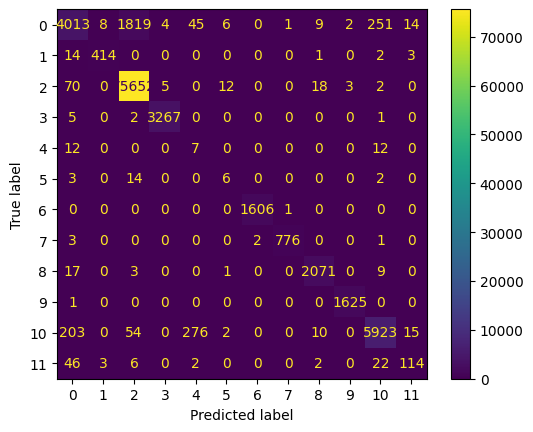

In [69]:
conf_mat = confusion_matrix(y_true=y_train,y_pred=predict)
conf_mat_plot = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.show()

### Precision, Recall, F1 Scoring

In [71]:
precision = precision_score(y_true=y_train,y_pred=predict,average='weighted')
recall = recall_score(y_true=y_train,y_pred=predict,average='weighted')
f1_score = f1_score(y_true=y_train,y_pred=predict,average='weighted')
print(precision)
print(recall)
print(f1_score)

0.9709979912976582
0.9693480754977511
0.9685878745147574


### Model Hyperparamter Tuning

In [75]:
'''
Run this below code for hyperparameter tuning, which will take upto 1 or 1.5 hours to run. (Depends on your machine)
param_gird = {
     'learning_rate':[0.01,0.001,0.1,1],
     'n_estimators':[20,30,40,50,120,150]
 }
 grid_search = GridSearchCV(estimator=GboostingC,param_grid=param_gird,cv=2)
 grid_search.fit(X_train,y_train)
 print(grid_search.best_estimator_)
 print(grid_search.best_params_)
 print(grid_search.best_params_)
 '''

"\nRun this below code for hyperparameter tuning, which will take upto 1 or 1.5 hours to run. (Depends on your machine)\nparam_gird = {\n     'learning_rate':[0.01,0.001,0.1,1],\n     'n_estimators':[20,30,40,50,120,150]\n }\n grid_search = GridSearchCV(estimator=GboostingC,param_grid=param_gird,cv=2)\n grid_search.fit(X_train,y_train)\n print(grid_search.best_estimator_)\n print(grid_search.best_params_)\n print(grid_search.best_params_)\n "

### Model Building on a Test set

In [77]:
GboostingC.fit(X_train,y_train) # Training model for GboostingC
y_pred = GboostingC.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
print(GboostingC.__class__.__name__,acc_score)
print(classification_report(y_test,y_pred))

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier 0.9683235867446394
                            precision    recall  f1-score   support

            ARP_poisioning       0.90      0.60      0.72      1578
            DDOS_Slowloris       0.95      0.96      0.96       100
             DOS_SYN_Hping       0.97      1.00      0.99     18897
              MQTT_Publish       1.00      1.00      1.00       871
Metasploit_Brute_Force_SSH       0.33      0.17      0.22         6
             NMAP_FIN_SCAN       0.00      0.00      0.00         3
         NMAP_OS_DETECTION       1.00      1.00      1.00       393
             NMAP_TCP_scan       1.00      1.00      1.00       220
             NMAP_UDP_SCAN       0.99      0.98      0.98       489
       NMAP_XMAS_TREE_SCAN       0.99      0.99      0.99       384
               Thing_Speak       0.93      0.95      0.94      1625
                Wipro_bulb       0.31      0.28      0.29        58

                  accuracy                           0.97     24624
